## Problem Formulation
We solve the Jack's Car Rental Problem with these formulations :
<list>
<li> States : Two locations, maximum of 20 cars each </li>
<li> Actions : The maximum number of cars we can move overnight is 5  ( -2 $ each ) </li>
<li> Reward : 10$ for each available car rented, gamma = 0.9 </li>
<li> Transitions : Poison Distribution </li>
<li> 1st location : avg req = 3 , avg ret = 3 </li>
<li> 2nd location : avg req = 4 , avg ret = 2 </li>
<li> The timestep are days, one timestep is one day, the state is the number of cars at each location and actions are the number of vehicles  where moved between these two locations overnight.Our policy, the selected action we take at a given state, will be from a set of numbers ranging from 5 to -5 that represent the number of cars moving from lot A to B.



In [1]:
import pandas as pd
from math import *
import numpy as np
import scipy
import matplotlib.pyplot as plt

In [3]:
class Agent():

	def __init__(self):
		"""
		Initialize the agent and the policy,
		actions, states and the Q - Table.
		"""
		self.policy = {}
		self.actions = []
		states = []
		#initalize the actions, car movement from a lot to another
		for i in range(2):
			for j in range(6):
				self.actions.append((i, j))
		#initialize the state space, for eac vehicle transaction the cost.		
		for i in range(21):
			for j in range(21):
				states.append((i, j))
		
		#initialize the Q-table where for each state is a reward.
		self.Qtable = {}
		for state in states:
			self.Qtable[state] = {}
			for action in self.actions:
				self.Qtable[state][action] = 0


	def move(self, state, epsilon = 0.1):
		"""
		Function where selects if the agent will do a random action or
		it will choose the best action based on what it has seen until now.
		We use the random state in order to explore fully the problem.
		"""
		if np.random.random() < epsilon:
			return agent.actions[np.random.randint(0, len(agent.actions))]
		else:
			action_value = 0
			best_action = (0, 0)
			for action in self.Qtable[state]:
				if self.Qtable[state][action] >= action_value:
					action_value = self.Qtable[state][action]
					best_action = action
			return best_action

In [4]:

class Location():
	"""
	Class location decribes the each lot.
	It contains the fuction to store and retrieves cars.
	"""
	def __init__(self):
		self.n_cars = 20

	def retrieve(self, num):
		self.n_cars -= num

	def store(self, num):
		self.n_cars += num
		if self.n_cars > 20:
			self.n_cars = 20

class Company():
	"""
	The company class contains the vehicles, stores and rents them.
	Also includes the actions where some cars move from a lot to another.
	"""

	def __init__(self):
		self.location_a = Location()
		self.location_b = Location()
		self.locations = [self.location_a, self.location_b]
		self.balance = 10
		self.rented = {0:0, 1:0}

	def move_a_to_b(self, num):
		if num > self.location_a.n_cars:
			return
		if num <= 5 and self.balance >= 2 * num:
			self.location_a.retrieve(num)
			self.location_b.store(num)
			self.balance -= 2 * num

	def move_b_to_a(self, num):
		if num > self.location_b.n_cars:
			return
		if num <= 5 and self.balance >= 2 * num:
			self.location_b.retrieve(num)
			self.location_a.store(num)
			self.balance -= 2 * num

	def rent(self, num, loc):
		if num > self.locations[loc].n_cars:
			self.rented[loc] += self.locations[loc].n_cars
			c = self.locations[loc].n_cars
			self.balance += 10 * self.locations[loc].n_cars
			self.locations[loc].n_cars = 0
			return -(num - c)
		else:
			self.rented[loc] += num
			self.balance += 10 * num
			self.locations[loc].retrieve(num)
			return num

	def return_cars(self, num, loc):
		self.locations[loc].store(num)
		self.rented[loc] -= num


Current distribution is: Location 1 has 20 cars and Location 2 has 15 cars.
The agent is moving 5 number of vehicles from location 1.
Current distribution is: Location 1 has 18 cars and Location 2 has 10 cars.
The agent is moving 5 number of vehicles from location 1.
Current distribution is: Location 1 has 19 cars and Location 2 has 7 cars.
The agent is moving 5 number of vehicles from location 1.
Current distribution is: Location 1 has 17 cars and Location 2 has 4 cars.
The agent is moving 5 number of vehicles from location 1.
Current distribution is: Location 1 has 14 cars and Location 2 has 3 cars.
The agent is moving 5 number of vehicles from location 1.
Current distribution is: Location 1 has 16 cars and Location 2 has 4 cars.
The agent is moving 5 number of vehicles from location 1.
Current distribution is: Location 1 has 16 cars and Location 2 has 6 cars.
The agent is moving 5 number of vehicles from location 1.
Current distribution is: Location 1 has 20 cars and Location 2 has 

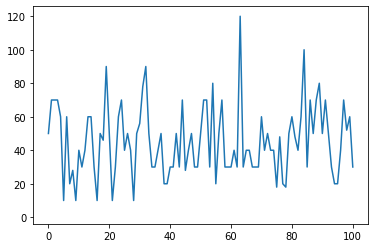

In [5]:
def agent_action(loc, num, company):
	print("Current distribution is: Location 1 has {} cars and Location 2 has {} cars.".format(company.locations[0].n_cars, company.locations[1].n_cars))
	print("The agent is moving {} number of vehicles from location {}.".format(num, loc))


def run_ai(rent_lambda_1, return_lambda_1, rent_lambda_2, return_lambda_2, thresh,
	   	 							company, agent, alpha, gamma, initialVehicles, gameLength):
	"""
	Function where it runs the simulation for the above parameters.

	"""
	game_over = False
	earning = []
	day = 0
	s = (initialVehicles, initialVehicles)
	a = (0, 0)
	while not game_over:
		earning_today = company.balance
		r = 0
		r += company.rent(np.random.poisson(rent_lambda_1), 0)
		r += company.rent(np.random.poisson(rent_lambda_2), 1)
		company.return_cars(np.random.poisson(return_lambda_1), 0)
		company.return_cars(np.random.poisson(return_lambda_2), 1)
		s_prime = (company.locations[0].n_cars, company.locations[1].n_cars)
		agent.Qtable[s][a] += alpha * (r + gamma * (np.max([agent.Qtable[s_prime][action] for action in agent.Qtable[s_prime]]) - agent.Qtable[s][a]))
		s = s_prime
		a_prime = agent.move(s_prime)
		a = a_prime
		loc, num = a_prime
		agent_action(loc, num, company)
		if loc == 0:
			company.move_a_to_b(num)
		else:
			company.move_b_to_a(num)
		earning_today = company.balance - earning_today
		earning.append(earning_today)
		day += 1
		#if the game last more than 200 days or the money is less tha the limit the game terminates
		if r < thresh or day > gameLength:
			game_over = True
	return earning

def plot(earning):
	x = np.arange(0, len(earning))
	plt.plot(x, earning, 2.0)
	plt.show()




################      main    ####################
company = Company()
agent = Agent()
rent_lambda_1 = 3
rent_lambda_2 = 4
return_lambda_1 = 3
return_lambda_2 = 2
thresh = -20
intialVehicles = 20
alpha = 0.1
gamma = 0.9
gameDuration = 100
numofGames = 1

for _ in range(numofGames):
	earning = run_ai(rent_lambda_1, return_lambda_1, rent_lambda_2, return_lambda_2, thresh, company, agent, alpha, gamma, intialVehicles, gameDuration)
#earning = run_human(rent_lambda_1, return_lambda_1, rent_lambda_2, return_lambda_2, thresh, company)
plot(earning)